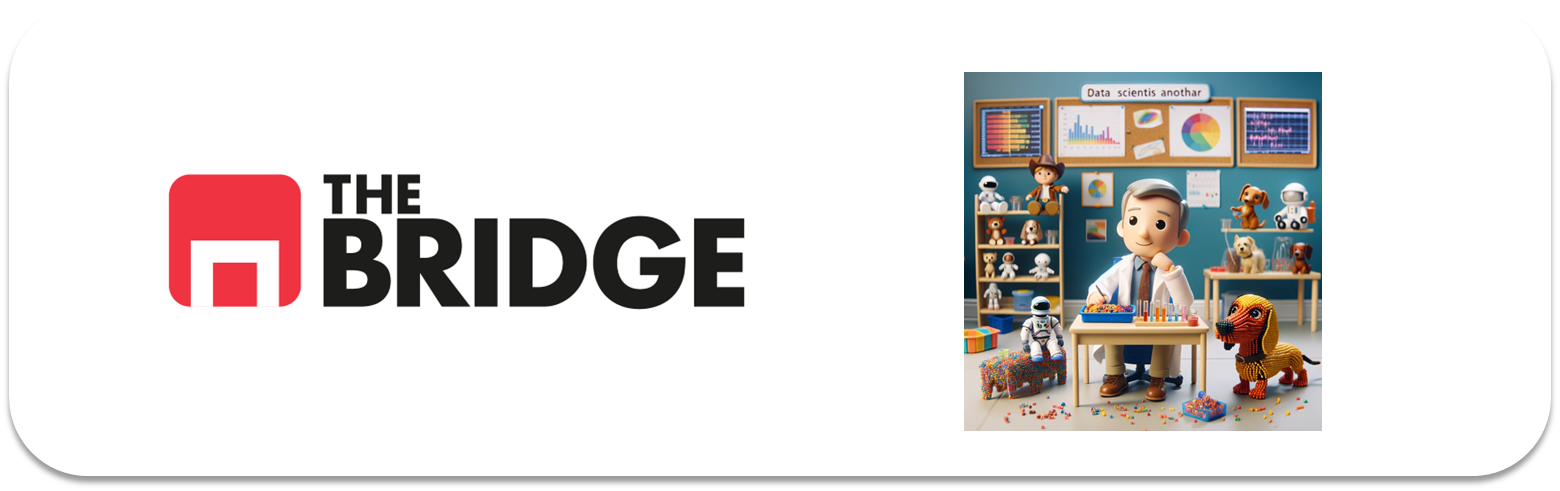

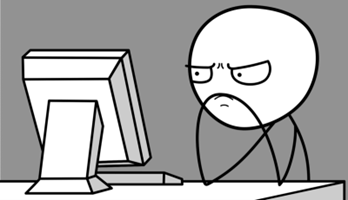

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bootcampviztools import *


### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [67]:
df = pd.read_csv("./data/car_crashes.csv",sep=("|"))
df.head(5).round(2)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.33,5.64,18.05,15.04,784.55,145.08,AL
1,1,18.1,7.42,4.53,16.29,17.01,1053.48,133.93,AK
2,2,18.6,6.51,5.21,15.62,17.86,899.47,110.35,AZ
3,3,22.4,4.03,5.82,21.06,21.28,827.34,142.39,AR
4,4,12.0,4.20,3.36,10.92,10.68,878.41,165.63,CA


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehñculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)

- speeding: está relacionado con el exceso de velocidad en los accidentes
- alcohol: si la persona había bebido o no
- not_distracted: si no hubo distracción en el acciente
- no_previous: si no hay antecedentes de accidentes previos

### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [69]:
df_medidas = df.describe().round(2)
df_medidas.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [70]:
df_medidas.loc["Mediana"] = df_medidas.median()
df_medidas

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.00,51.000,51.000,51.00,51.000,51.00,51.00,51.000
mean,25.00,15.790,5.000,4.89,13.570,14.00,886.96,134.490
std,14.87,4.120,2.020,1.73,4.510,3.76,178.30,24.840
min,0.00,5.900,1.790,1.59,1.760,5.90,641.96,82.750
25%,12.50,12.750,3.770,3.89,10.480,11.35,768.43,114.640
50%,25.00,15.600,4.610,4.55,13.860,13.78,858.97,136.050
75%,37.50,18.500,6.440,5.60,16.140,16.76,1007.94,151.870
max,50.00,23.900,9.450,10.04,23.660,21.28,1301.52,194.780
Mediana,25.00,15.695,4.805,4.72,13.715,13.89,813.70,124.565


In [71]:
df_medidas.loc["Rg Total"] = df_medidas.loc["max"]-df_medidas.loc["min"]
df_medidas

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.00,51.000,51.000,51.00,51.000,51.00,51.00,51.000
mean,25.00,15.790,5.000,4.89,13.570,14.00,886.96,134.490
std,14.87,4.120,2.020,1.73,4.510,3.76,178.30,24.840
min,0.00,5.900,1.790,1.59,1.760,5.90,641.96,82.750
25%,12.50,12.750,3.770,3.89,10.480,11.35,768.43,114.640
50%,25.00,15.600,4.610,4.55,13.860,13.78,858.97,136.050
75%,37.50,18.500,6.440,5.60,16.140,16.76,1007.94,151.870
max,50.00,23.900,9.450,10.04,23.660,21.28,1301.52,194.780
Mediana,25.00,15.695,4.805,4.72,13.715,13.89,813.70,124.565
Rg Total,50.00,18.000,7.660,8.45,21.900,15.38,659.56,112.030


In [82]:
df_medidas.loc["Rg IQR"] = df_medidas.loc["75%"]-df_medidas.loc["25%"]
df_medidas.round(2).T

,count,mean,std,min,25%,50%,75%,max,Mediana,Rg Total,Rg IQR
Unnamed: 0,51.0,25.00,14.87,0.00,12.50,25.00,37.50,50.00,25.00,50.00,25.00
total,51.0,15.79,4.12,5.90,12.75,15.60,18.50,23.90,15.70,18.00,5.75
speeding,51.0,5.00,2.02,1.79,3.77,4.61,6.44,9.45,4.80,7.66,2.67
alcohol,51.0,4.89,1.73,1.59,3.89,4.55,5.60,10.04,4.72,8.45,1.71
not_distracted,51.0,13.57,4.51,1.76,10.48,13.86,16.14,23.66,13.72,21.90,5.66
no_previous,51.0,14.00,3.76,5.90,11.35,13.78,16.76,21.28,13.89,15.38,5.41
ins_premium,51.0,886.96,178.30,641.96,768.43,858.97,1007.94,1301.52,813.70,659.56,239.51
ins_losses,51.0,134.49,24.84,82.75,114.64,136.05,151.87,194.78,124.56,112.03,37.23


In [85]:
df_medidas.loc["CV"] = df_medidas.loc["std"]/df_medidas.loc["mean"]
df_medidas

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.0000,51.000000,51.000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.0000,15.790000,5.000,4.890000,13.570000,14.000000,886.960000,134.490000
std,14.8700,4.120000,2.020,1.730000,4.510000,3.760000,178.300000,24.840000
min,0.0000,5.900000,1.790,1.590000,1.760000,5.900000,641.960000,82.750000
25%,12.5000,12.750000,3.770,3.890000,10.480000,11.350000,768.430000,114.640000
50%,25.0000,15.600000,4.610,4.550000,13.860000,13.780000,858.970000,136.050000
75%,37.5000,18.500000,6.440,5.600000,16.140000,16.760000,1007.940000,151.870000
max,50.0000,23.900000,9.450,10.040000,23.660000,21.280000,1301.520000,194.780000
Mediana,25.0000,15.695000,4.805,4.720000,13.715000,13.890000,813.700000,124.565000
Rg Total,50.0000,18.000000,7.660,8.450000,21.900000,15.380000,659.560000,112.030000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'total'}>,
        <Axes: title={'center': 'speeding'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'not_distracted'}>,
        <Axes: title={'center': 'no_previous'}>],
       [<Axes: title={'center': 'ins_premium'}>,
        <Axes: title={'center': 'ins_losses'}>, <Axes: >]], dtype=object)

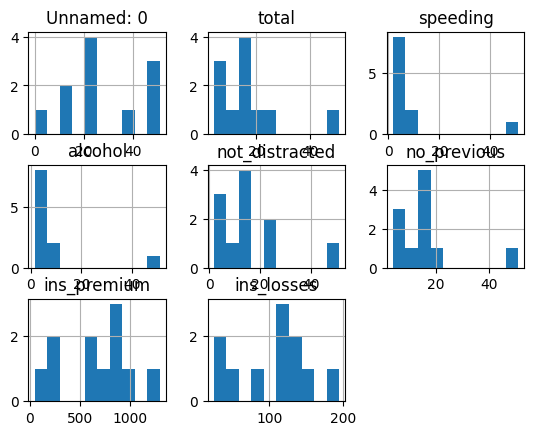

In [76]:
df_medidas.hist()

### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

In [80]:
df["abbrev"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [78]:
len(df["abbrev"])

51

Parece que son las iniciales de los clientes que han tenido el incidente. No le cambiaría el nombre

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [86]:
CV_speeding = df.describe().loc["std"]/df.describe().loc["mean"]
CV_speeding

Unnamed: 0        0.594643
total             0.261048
speeding          0.403695
alcohol           0.353839
not_distracted    0.332198
no_previous       0.268811
ins_premium       0.201020
ins_losses        0.184663
dtype: float64

(2,)


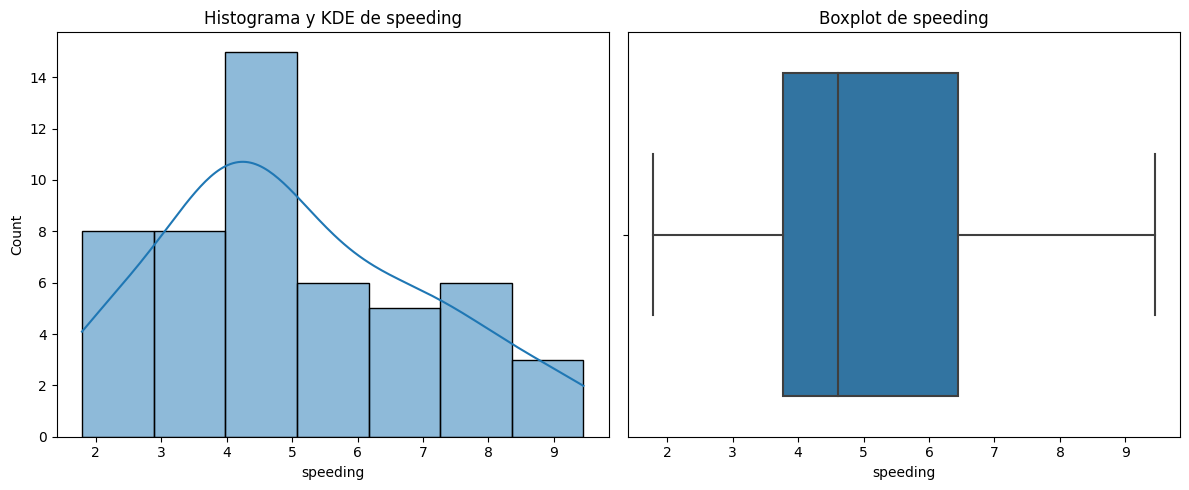

In [84]:
plot_combined_graphs(df,["speeding"])

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


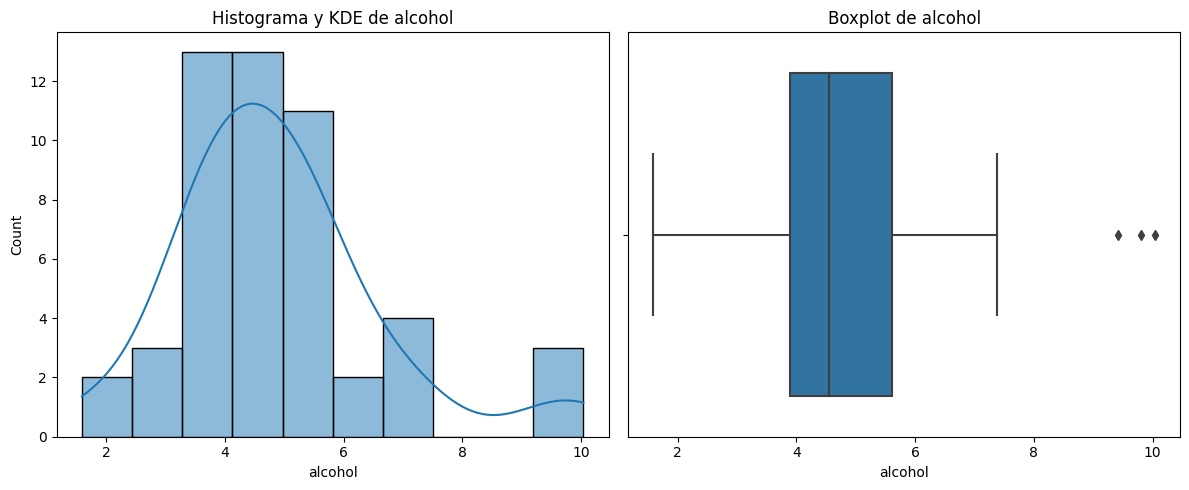

In [87]:
plot_combined_graphs(df,["alcohol"])

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


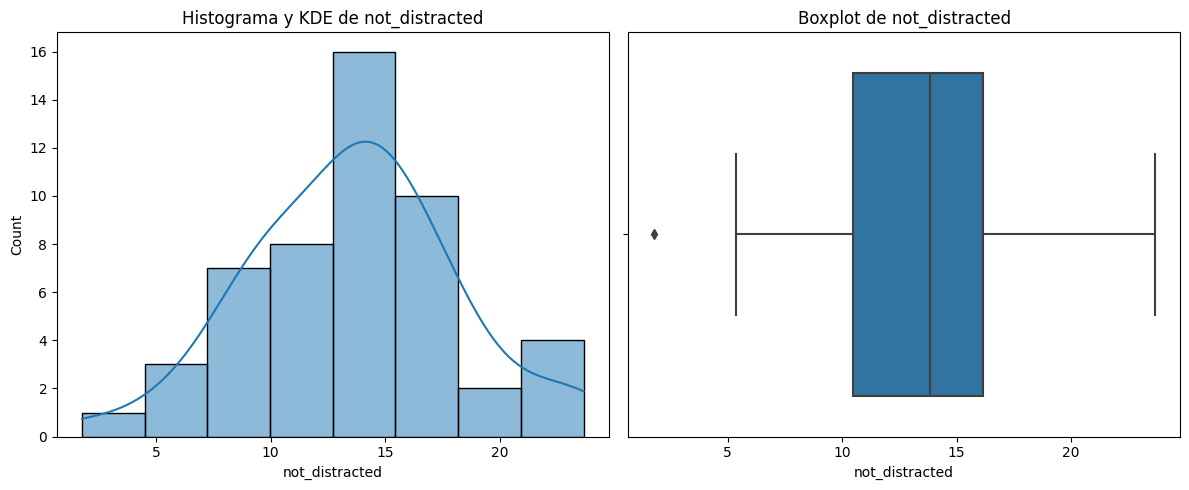

In [88]:
plot_combined_graphs(df,["not_distracted"])

### Ejercicio 8

El diagrma de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

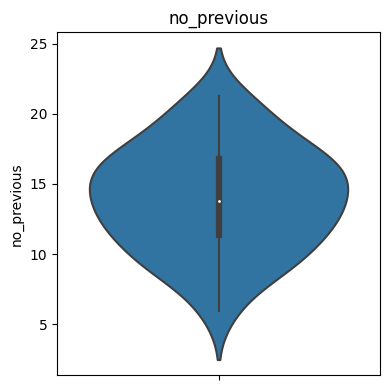

In [89]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df, ["no_previous"])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

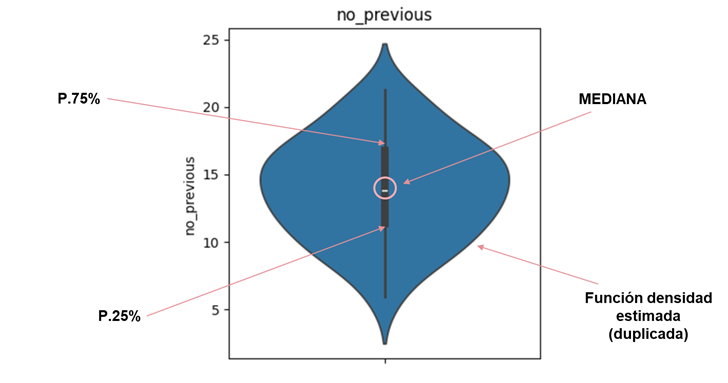

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

In [90]:
df_medidas["no_previous"]

count       51.000000
mean        14.000000
std          3.760000
min          5.900000
25%         11.350000
50%         13.780000
75%         16.760000
max         21.280000
Mediana     13.890000
Rg Total    15.380000
Rg IQR       5.410000
CV           0.268571
Name: no_previous, dtype: float64

(2,)


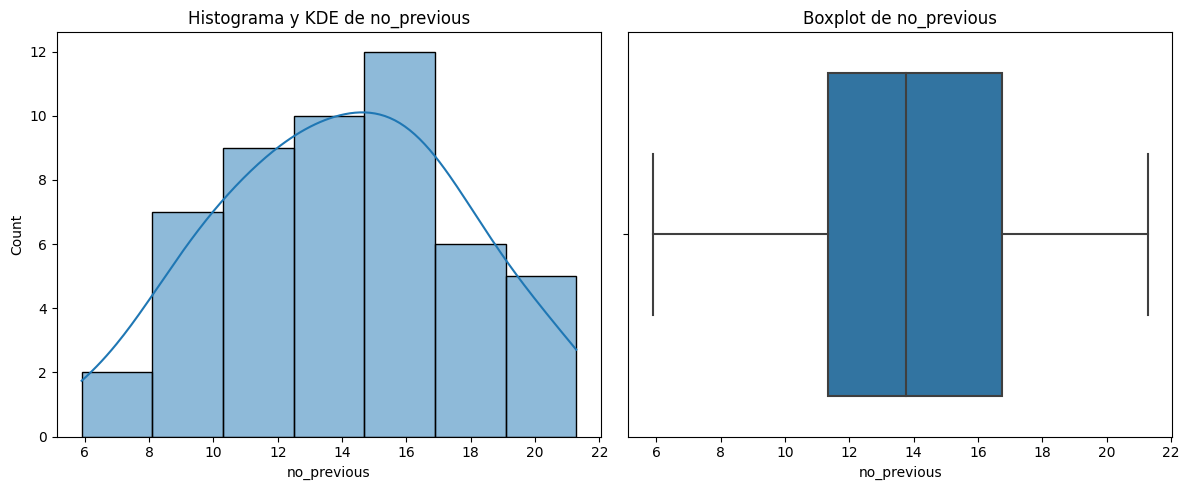

In [91]:
plot_combined_graphs(df,["no_previous"])

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [92]:
df_marketing = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_marketing.head() 

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [93]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [96]:
df_cardinalidad = df_marketing.nunique()/len(df_marketing)*100
df_cardinalidad.round(2)

customer                         100.00
state                              0.05
customer_lifetime_value           88.03
response                           0.02
coverage                           0.03
education                          0.05
effective_to_date                  0.65
employmentstatus                   0.05
gender                             0.02
income                            62.34
location_code                      0.03
marital_status                     0.03
monthly_premium_auto               2.21
months_since_last_claim            0.39
months_since_policy_inception      1.09
number_of_open_complaints          0.07
number_of_policies                 0.10
policy_type                        0.03
policy                             0.10
renew_offer_type                   0.04
sales_channel                      0.04
total_claim_amount                55.90
vehicle_class                      0.07
vehicle_size                       0.03
dtype: float64

(2,)


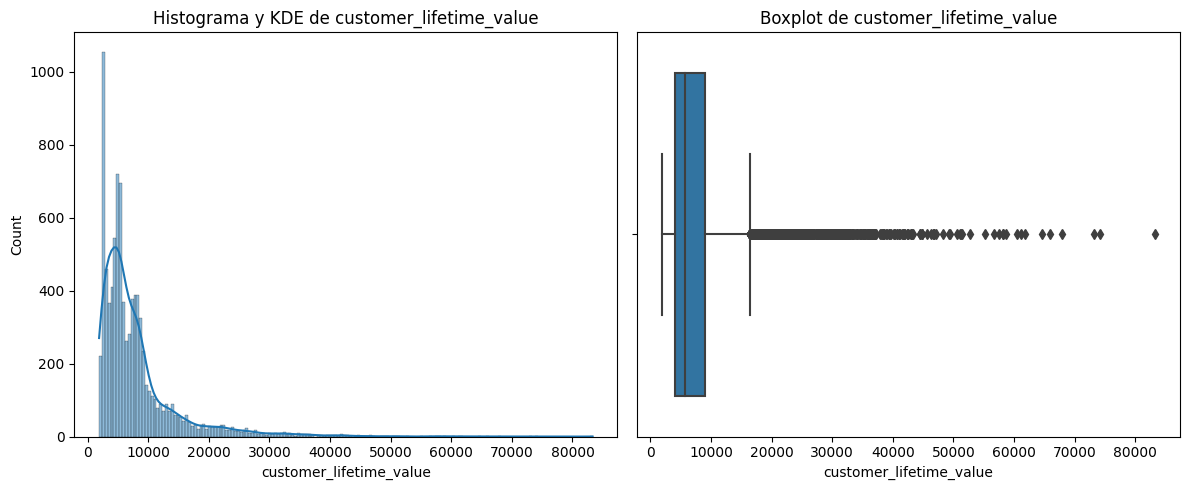

In [97]:
plot_combined_graphs(df_marketing,["customer_lifetime_value"])

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

In [121]:
df_marketing["customer_lifetime_value"].describe().round(2)

count     9134.00
mean      8004.94
std       6870.97
min       1898.01
25%       3994.25
50%       5780.18
75%       8962.17
max      83325.38
Name: customer_lifetime_value, dtype: float64

(2,)


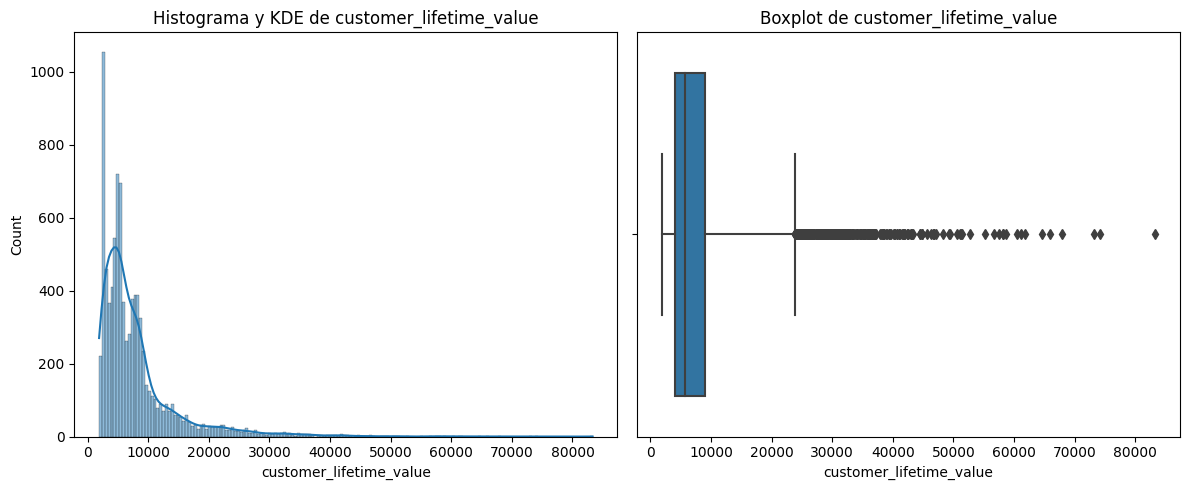

In [99]:
plot_combined_graphs(df_marketing,["customer_lifetime_value"], whisker_width=3)

(2,)


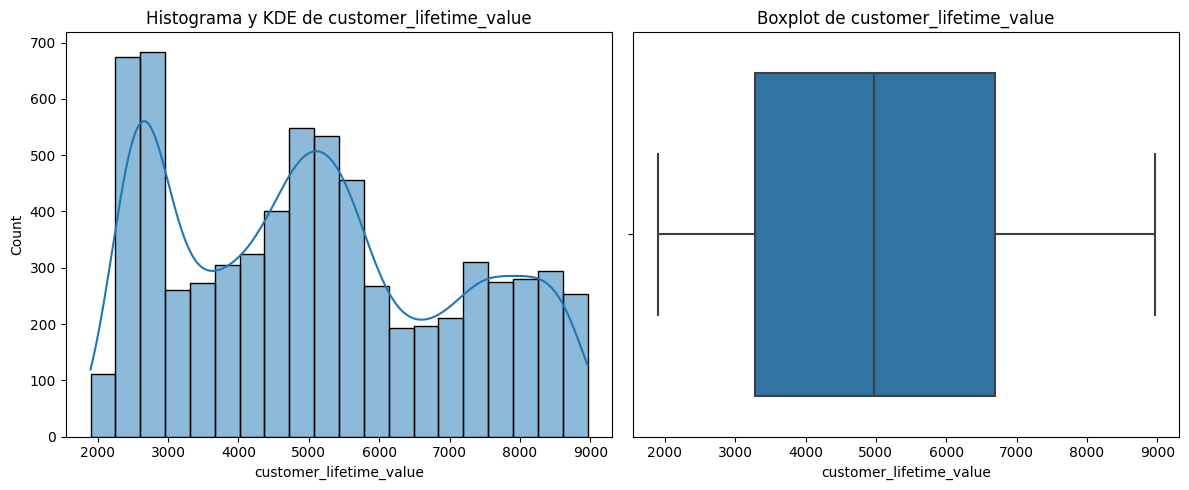

In [151]:
q1 = df_marketing["customer_lifetime_value"].quantile(0.75)

df_valores_superiores = df_marketing[df_marketing["customer_lifetime_value"] <= q1]
plot_combined_graphs(df_valores_superiores,["customer_lifetime_value"])

(2,)


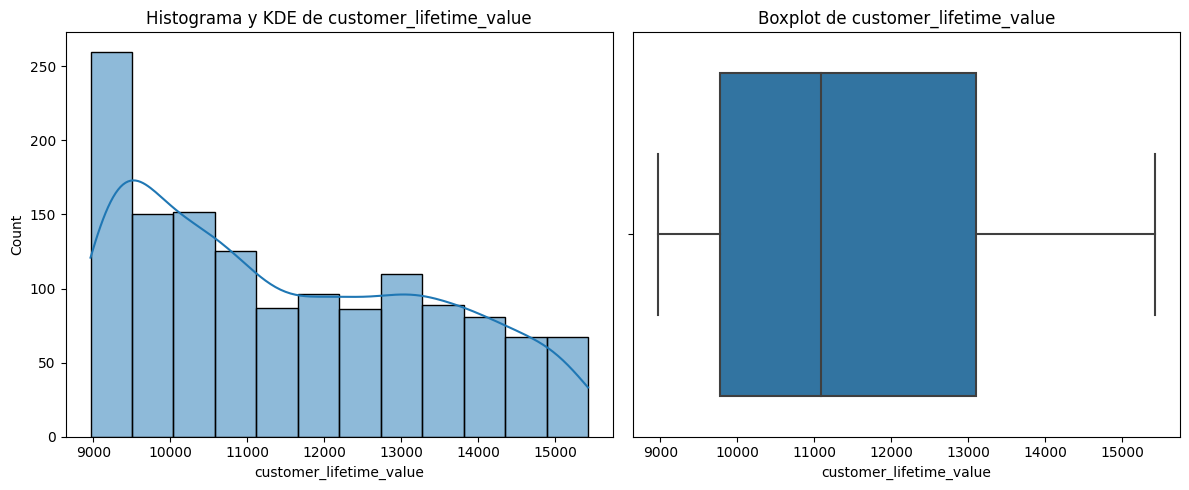

In [152]:
q3 = df_marketing["customer_lifetime_value"].quantile(0.90)

df_valores_intermedios = df_marketing[(df_marketing["customer_lifetime_value"] > q1) & (df_marketing["customer_lifetime_value"] < q3)]
plot_combined_graphs(df_valores_intermedios,["customer_lifetime_value"])

(2,)


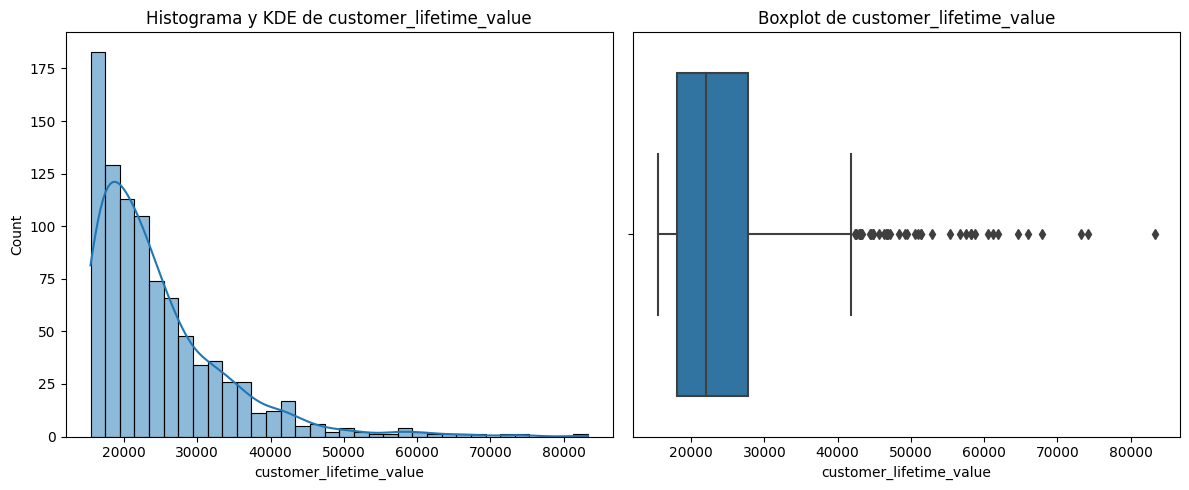

In [153]:
df_valores_long_tail = df_marketing[df_marketing["customer_lifetime_value"] >= q3]
plot_combined_graphs(df_valores_long_tail,["customer_lifetime_value"])

In [154]:
print("Valores superiores:", len(df_valores_superiores))
print("Valores intermedios:", len(df_valores_intermedios))
print("Valores long_tail:", len(df_valores_long_tail))

Valores superiores: 6850
Valores intermedios: 1370
Valores long_tail: 914


In [155]:
lista_valores = np.array([df_valores_superiores["customer_lifetime_value"].describe().round(2) , df_valores_intermedios["customer_lifetime_value"].describe().round(2), df_valores_long_tail["customer_lifetime_value"].describe().round(2)])
df_comparativa = pd.DataFrame(lista_valores,index = ["superiores","intermedios","long_tail"], columns=df_valores_superiores["customer_lifetime_value"].describe().index)
df_comparativa

,count,mean,std,min,25%,50%,75%,max
superiores,6850.0,5098.16,1966.10,1898.01,3286.88,4974.80,6685.62,8960.28
intermedios,1370.0,11503.00,1895.13,8962.80,9776.55,11089.80,13093.80,15428.01
long_tail,914.0,24546.65,9065.94,15435.69,18062.76,22065.14,27789.69,83325.38


In [159]:
df_comparativa["%_usuarios"] = (df_comparativa["count"]/df_comparativa["count"].sum()).round(2)
df_comparativa

,count,mean,std,min,25%,50%,75%,max,%_usuarios
superiores,6850.0,5098.16,1966.10,1898.01,3286.88,4974.80,6685.62,8960.28,0.75
intermedios,1370.0,11503.00,1895.13,8962.80,9776.55,11089.80,13093.80,15428.01,0.15
long_tail,914.0,24546.65,9065.94,15435.69,18062.76,22065.14,27789.69,83325.38,0.10


### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?